## Customer Churn Prediction Project
### By saher — ITI Power BI Track, Data Mining Course

##  1. Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

## 2.Load the Dataset

In [13]:
data = pd.read_excel('churn_dataset.xlsx')
print(data.head())

   Age  Tenure     Sex Churn
0   56       8    Male    No
1   46      63  Female    No
2   32      11  Female    No
3   60       8    Male    No
4   25      35    Male    No


## 3. Data Preprocessing
#### Encode “Sex” & “Churn” to numeric
#### Check & handle missing values

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])
data.head()


,Age,Tenure,Sex,Churn
0,56,8,1,0
1,46,63,0,0
2,32,11,0,0
3,60,8,1,0
4,25,35,1,0


In [29]:
print(data.isnull().sum())

Age       0
Tenure    0
Sex       0
Churn     0
dtype: int64


### 4. Split into Train & Test Sets

In [30]:
X = data[['Age', 'Tenure', 'Sex']]
y = data['Churn']

print(X.head())
print(y.head())

   Age  Tenure  Sex
0   56       8    1
1   46      63    0
2   32      11    0
3   60       8    1
4   25      35    1
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [31]:
print("Shape of data before split:", data.shape)

Shape of data before split: (100, 4)


### 5. Train Naive Bayes Model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(80, 3) (20, 3)


In [33]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[16  0]
 [ 4  0]]


### 6. Evaluate Model

In [34]:
model = GaussianNB()
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


In [35]:
y_pred = model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 80.00%


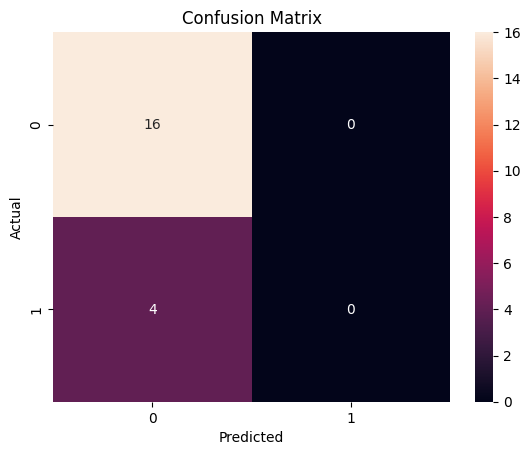

In [38]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
